In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Review

**Question**

______

In [2]:
united = Table.read_table('united.csv')

In [3]:
united.show(6)

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6


**Reminder:** We are treating this dataset as the population of all United Airlines flights that occurred over the two month period.

In [5]:
population_parameter = np.average(united.column('Delay'))
population_parameter

16.658155515370705

**Question**

_____

In [6]:
births = Table.read_table('baby.csv')
births.show(6)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False


**Reminder:** We are treating this dataset as a random sample from a hosptial system.

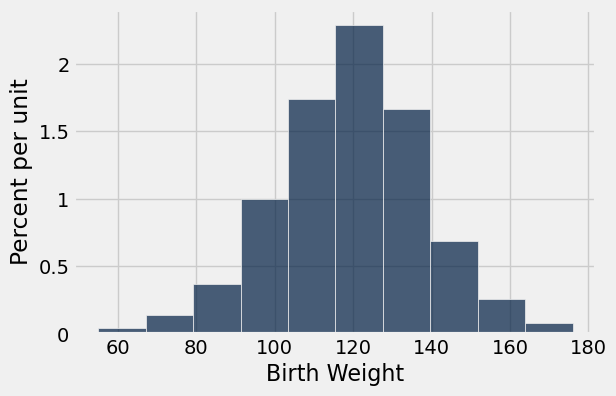

In [7]:
births.hist('Birth Weight')

## New material

### A bell shape tells us more about a distribution

In [8]:
def chebyshev(num_SDs):
    # returns the least proportion of the data in +/- num_SDs
    z = num_SDs
    return 1 - 1/z**2  

In [9]:
chebyshev(make_array(1,2,3))

array([ 0.        ,  0.75      ,  0.88888889])

**Task**: Empirically verify that for a bell shaped distribution,
- the proportion of values within 1, 2 and 3 SDs of the mean is 68, 95, and 99.75 percent, respectively.

In [10]:
birth_weight_mean = np.average(births.column('Birth Weight'))
birth_weight_mean

119.46252129471891

In [11]:
birth_weight_sd = np.std(births.column('Birth Weight'))
birth_weight_sd

18.320863702202779

###### Within 1 SD

In [12]:
births.where('Birth Weight', are.between(birth_weight_mean - birth_weight_sd,
                                        birth_weight_mean + birth_weight_sd)).num_rows/births.num_rows

0.692504258943782

###### Within 2 SD

In [13]:
births.where('Birth Weight', are.between(birth_weight_mean - 2*birth_weight_sd,
                                        birth_weight_mean + 2*birth_weight_sd)).num_rows/births.num_rows

0.948892674616695

In [14]:
births.where('Birth Weight', are.between(birth_weight_mean - 3*birth_weight_sd,
                                        birth_weight_mean + 3*birth_weight_sd)).num_rows/births.num_rows

0.995741056218058

**STOP**

### The Central Limit Theorem (CLT)

**Task**: Show that the empirical distribution of the sample mean approaches a bell shape as the sample size (for each statistic used to create the distribution) increases.

- Though the CLT is a statement about the probability distribution of the statistic, the empirical distribution will look roughly like the probability distribution when the repetition size is large. Here, we set it to 10,000.

In [15]:
def one_sample_mean(sample_size):
    """ 
    Takes a sample from the population of flights 
    and computes its mean
    """
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [20]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [21]:
def plot_sample_mean_distribution(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    
    Table().with_column('Mean of ' + str(sample_size) + ' flight delays', 
                        sample_means).hist(bins=20)

    print('Population Average:', population_parameter)

Population Average: 16.6581555154


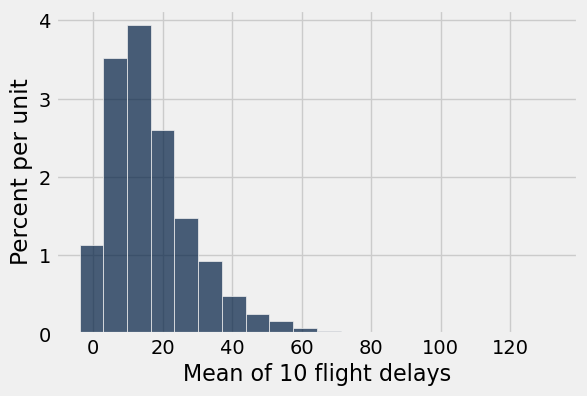

In [22]:
plot_sample_mean_distribution(10)

Population Average: 16.6581555154


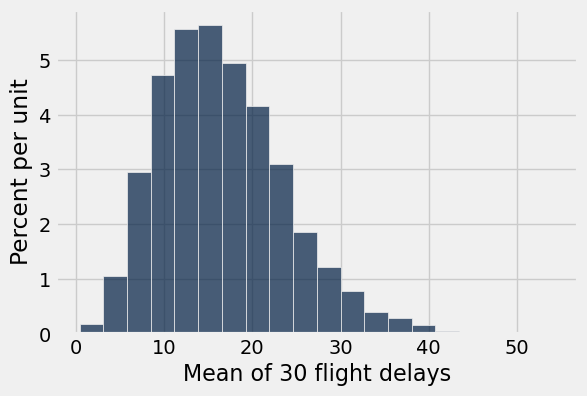

In [23]:
plot_sample_mean_distribution(30)

Population Average: 16.6581555154


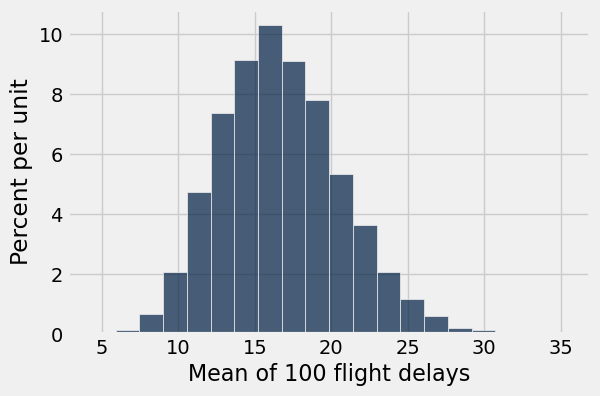

In [24]:
plot_sample_mean_distribution(100)

Population Average: 16.6581555154


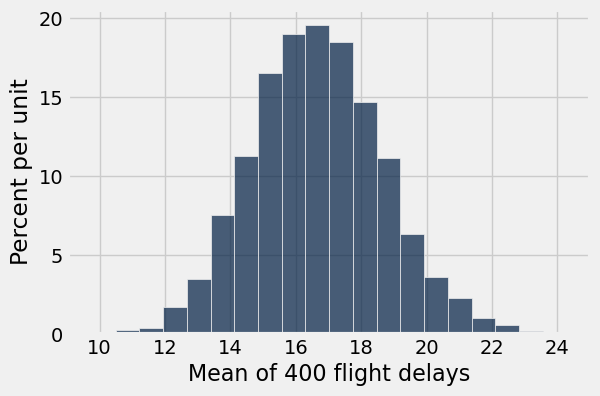

In [25]:
plot_sample_mean_distribution(400)

**Discussion Question** [2 min]

After rolling 1,000,000 fair 6-sided dice, which of these histograms would you expect to have a bell shape? 
- You might expect there to be one (or more than one)!

**1.** The histogram of outcomes of these million rolls

**2.** The histogram that results from computing the average outcome of these million rolls

**3.** The histogram that results from:
 - splitting the outcomes into 1,000 groups of 1,000 (in the order they occurred)
 - and computing the average outcome of each group


###### Histogram 1

In [26]:
die = make_array(1,2,3,4,5,6)

In [27]:
one_million_die_rolls = np.random.choice(die,size = 1000000)

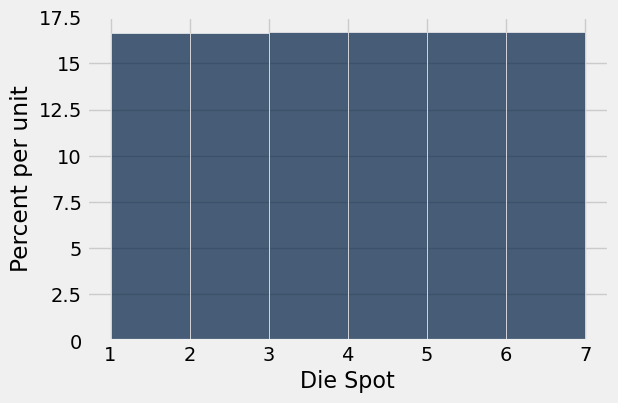

In [28]:
Table().with_columns('Die Spot', one_million_die_rolls).hist(bins = np.arange(1,8))

###### Histogram 2

In [29]:
one_million_die_average = np.average(one_million_die_rolls)
one_million_die_average

3.501703

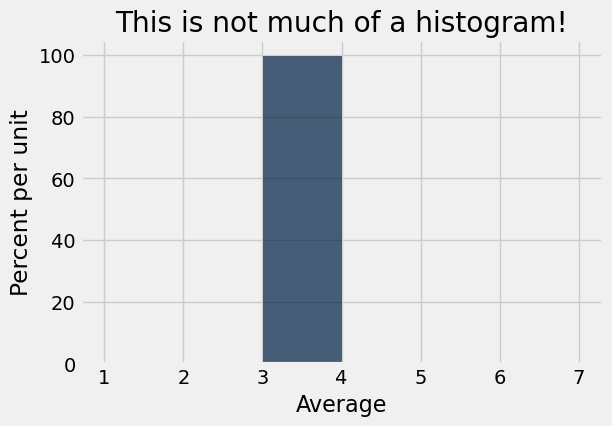

In [30]:
Table().with_columns('Average', one_million_die_average).hist(bins = np.arange(1,8))
plots.title('This is not much of a histogram!');

###### Histogram 3

In [31]:
one_million_roll_table = Table().with_columns('Die Spot', one_million_die_rolls)

In [32]:
np.average(one_million_roll_table.take(np.arange(1000)).column('Die Spot'))

3.5110000000000001

In [33]:
group_averages = make_array()
start = 0
for i in np.arange(1000):
    group_average = np.average(one_million_roll_table.take(np.arange(start, start + 1000)).column('Die Spot'))
    group_averages = np.append(group_averages, group_average)
    start = start + 1000

In [34]:
group_averages

array([ 3.511,  3.441,  3.395,  3.557,  3.486,  3.529,  3.526,  3.495,
        3.469,  3.563,  3.562,  3.438,  3.506,  3.559,  3.577,  3.488,
        3.511,  3.534,  3.607,  3.491,  3.606,  3.451,  3.518,  3.448,
        3.506,  3.497,  3.46 ,  3.519,  3.397,  3.478,  3.52 ,  3.5  ,
        3.535,  3.588,  3.556,  3.579,  3.541,  3.489,  3.477,  3.55 ,
        3.498,  3.439,  3.53 ,  3.57 ,  3.547,  3.598,  3.479,  3.497,
        3.525,  3.523,  3.563,  3.499,  3.479,  3.579,  3.512,  3.457,
        3.532,  3.534,  3.633,  3.542,  3.556,  3.548,  3.51 ,  3.529,
        3.473,  3.526,  3.508,  3.556,  3.518,  3.525,  3.612,  3.566,
        3.524,  3.455,  3.364,  3.53 ,  3.541,  3.469,  3.525,  3.565,
        3.497,  3.492,  3.443,  3.505,  3.45 ,  3.513,  3.493,  3.506,
        3.52 ,  3.553,  3.63 ,  3.484,  3.436,  3.611,  3.519,  3.463,
        3.517,  3.486,  3.484,  3.619,  3.523,  3.525,  3.442,  3.507,
        3.463,  3.381,  3.438,  3.546,  3.396,  3.559,  3.508,  3.56 ,
      

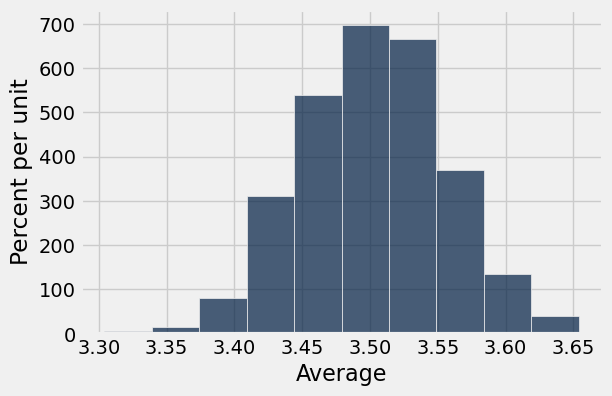

In [35]:
Table().with_columns('Average', group_averages).hist()

**Last Review Question**